## Metrics

#### Classification:
- Confusion Matrix
- Accuracy score
- Misclassification score
- Precision score (Positive Predictive Value, PPV)
- Recall score (Sensitivity, True Positive Rate)
- F1 score
- Classification Report
- ROC
- AUC

#### Regression:
- R2
- MSE
- Mean Absolute Error (MAE)
- Explained Variance

#### Clustering:
- Adjusted Rand Index
- Homogeneity
- V-measure
- Completeness

#### To do:
- More on Loss Functions
- Cross-Entropy (log loss) # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html
- Hinge https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html#sklearn.metrics.hinge_loss
- Huber
- Hammington https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html
- Kullback-Leibler
- https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics
- https://scikit-learn.org/stable/modules/learning_curve.html

# Classification

### Confusion Matrix

- Returns: array, shape = [n_classes, n_classes]
- 0, 1 and 2 classified as 0, 1 or 2
- A/B: TN, FP, FN, TP

#### Multiclass with no labels

In [290]:
import pandas as pd

y_test = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

In [291]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)

display(pd.DataFrame(cf))
# https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

,0,1,2
0,2,0,0
1,0,0,1
2,1,0,2


#### Multiclass with labels

In [292]:
y_test = ["C", "A", "C", "C", "A", "B"]
y_pred = ["A", "A", "C", "C", "A", "C"]
labels = ["A", "B", "C"]

In [293]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred, labels=labels)

df = pd.DataFrame(cf, index=labels, columns=labels)
display(df)

,A,B,C
A,2,0,0
B,0,0,1
C,1,0,2


#### Extracted binary confusion matrix

In [294]:
y_test = [1, 1, 0, 0,   1, 1]
y_pred = [1, 0, 1, 0,   1, 1]

In [295]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('True Positive: {}'.format(tp))
print('True Negative: {}'.format(tn))
print('False Positive: {}'.format(fp))
print('False Negative: {}'.format(fn))

True Positive: 3
True Negative: 1
False Positive: 1
False Negative: 1


### Accuracy score
 Overall, how often is the classifier correct?


- Accuracy - a ratio of correctly predicted labels to the number of total samples. 
- Accuracy = TP+TN/TP+FP+FN+TN
- Good measure if values of false positive and false negatives are simillar. 


#### Accuracy ratio

In [289]:
y_test      = ['B', 'A', 'A', 'C', 'B'] # Ground truth 
predictions = ['A', 'A', 'C', 'B', 'B'] # Predictions

In [49]:
from sklearn.metrics import accuracy_score
acc  = accuracy_score(y_test, predictions) # 2/5
print('{}'.format(acc))

0.4


#### Nr of correctly classified samples

In [285]:
y_test      = [2, 1, 1, 3, 2] # Ground truth 
predictions = [1, 1, 3, 2, 2] # Predictions

In [286]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions, normalize=False)
print('{}'.format(acc))

2


#### Weighted

In [282]:
y_test      = [2, 1, 1, 3, 2] # Ground truth 
predictions = [1, 1, 3, 2, 2] # Predictions

In [283]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions, sample_weight=[0,1,0,0,1])
print('{}'.format(acc))

1.0


### Misclassification score (1 minus Accuracy)
Overall, how often is it wrong?

- Misclassification 
- (FP+FN)/total
- equivalent to 1 minus Accuracy
- also known as "Error Rate

### Precision score (Positive Predictive Value, PPV)

When it predicts yes, how often is it correct?

- Returns: float (if average is not None) or array of floats.
- Ratio of correctly predicted positive labels to all samples predicted positive.
- Of all emails classified as spam, how many actually was a spam?
- Precision = TP/TP+FP
- High FP = low Precision.
- Ability of the classifier not to label as positive a sample that is negative.
- The best value is 1 and the worst value is 0.

Averaging:
-  required for multiclass/multilabel targets. 
-  None: the scores for each class are returned. 
- 'binary': Only report results for the class specified by pos_label. 
- 'micro': calc globally by counting the total true positives, false negatives and false positives.
- 'macro': calc each label, and find their unweighted mean. 
- 'weighted' calc each label, and find their average weighted 
- 'samples': calc each instance, and find their average.


In [ ]:
precision_score(y_true, y_pred, 
                labels=None, # set of labels to include if not binary
                pos_label=1, # class to report if average and data are binary.
                average='binary', # below
                sample_weight=None)

In [64]:
from sklearn.metrics import precision_score

y_test = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

#### Precision

In [65]:
ps = precision_score(y_test, y_pred, average=None)
print('{}'.format(ps))

[0.66666667 0.         0.        ]


#### Precision with macro averaging

In [66]:
ps = precision_score(y_test, y_pred, average='macro') 
print('{}'.format(ps))

0.2222222222222222


#### Precision with micro averaging

In [67]:
ps = precision_score(y_test, y_pred, average='micro')  
print('{}'.format(ps))

0.3333333333333333


#### Precision with weighted averaging

In [68]:
ps = precision_score(y_test, y_pred, average='weighted')
print('{}'.format(ps))

0.2222222222222222


### Recall score (Sensitivity, True Positive Rate)
When it's actually yes, how often does it predict yes?

- Ability of the classifier to find all the positive samples.
- Ratio of correctly predicted positive labels to the all samples in actual class. 
- Recall = TP/TP+FN
- The best value is 1 and the worst value is 0.
- Returns: float (if average is not None) or array of floats.

Averaging:
-  required for multiclass/multilabel targets. 
-  None: the scores for each class are returned. 
- 'binary': Only report results for the class specified by pos_label. 
- 'micro': calc globally by counting the total true positives, false negatives and false positives.
- 'macro': calc each label, and find their unweighted mean. 
- 'weighted' calc each label, and find their average weighted 
- 'samples': calc each instance, and find their average.

In [ ]:
recall_score(y_true, y_pred, 
             labels=None, # set of labels to include if not binary
             pos_label=1, # class to report if average and data are binary.
             average='binary', # below
             sample_weight=None)

In [70]:
from sklearn.metrics import recall_score
y_test = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

#### Recall score

In [71]:
rs = recall_score(y_test, y_pred, average=None)
print('{}'.format(rs))

[1. 0. 0.]


#### Macro averaged recall score 

In [72]:
rs = recall_score(y_test, y_pred, average='macro')  
print('{}'.format(rs))

0.3333333333333333


#### Micro averaged recall score 

In [73]:
rs = recall_score(y_test, y_pred, average='micro')  
print('{}'.format(rs))

0.3333333333333333


#### Weighted averaged recall score 

In [74]:
rs = recall_score(y_test, y_pred, average='weighted')  
print('{}'.format(rs))

0.3333333333333333


### Average Precision score


- s
- s

sklearn.metrics.average_precision_score(y_true, y_score, average=’macro’, pos_label=1, sample_weight=None)[source]
Compute average precision (AP) from prediction scores

AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight:

where  and  are the precision and recall at the nth threshold [1]. This implementation is not interpolated and is different from computing the area under the precision-recall curve with the trapezoidal rule, which uses linear interpolation and can be too optimistic.

Note: this implementation is restricted to the binary classification task or multilabel classification task.

Read more in the User Guide.

Parameters:	
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).

average : string, [None, ‘micro’, ‘macro’ (default), ‘samples’, ‘weighted’]
If None, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

'micro':
Calculate metrics globally by considering each element of the label indicator matrix as a label.

'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted':
Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label).

'samples':
Calculate metrics for each instance, and find their average.

Will be ignored when y_true is binary.

pos_label : int or str (default=1)
The label of the positive class. Only applied to binary y_true. For multilabel-indicator y_true, pos_label is fixed to 1.

sample_weight : array-like of shape = [n_samples], optional
Sample weights.

Returns:	
average_precision : float
See also
roc_auc_score
Compute the area under the ROC curve
precision_recall_curve
Compute precision-recall pairs for different probability thresholds
Notes

Changed in version 0.19: Instead of linearly interpolating between operating points, precisions are weighted by the change in recall since the last operating point.

References

[1]	(1, 2) Wikipedia entry for the Average precision
Examples

>>>
>>> import numpy as np
>>> from sklearn.metrics import average_precision_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> average_precision_score(y_true, y_scores)  
0.83...

### Precision-Recall curve

precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)[source]
Compute precision-recall pairs for different probability thresholds

Note: this implementation is restricted to the binary classification task.

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The last precision and recall values are 1. and 0. respectively and do not have a corresponding threshold. This ensures that the graph starts on the y axis.

Read more in the User Guide.

Parameters:	
y_true : array, shape = [n_samples]
True targets of binary classification in range {-1, 1} or {0, 1}.

probas_pred : array, shape = [n_samples]
Estimated probabilities or decision function.

pos_label : int or str, default=None
The label of the positive class

sample_weight : array-like of shape = [n_samples], optional
Sample weights.

Returns:	
precision : array, shape = [n_thresholds + 1]
Precision values such that element i is the precision of predictions with score >= thresholds[i] and the last element is 1.

recall : array, shape = [n_thresholds + 1]
Decreasing recall values such that element i is the recall of predictions with score >= thresholds[i] and the last element is 0.

thresholds : array, shape = [n_thresholds <= len(np.unique(probas_pred))]
Increasing thresholds on the decision function used to compute precision and recall.

See also
average_precision_score
Compute average precision from prediction scores
roc_curve
Compute Receiver operating characteristic (ROC) curve
Examples

>>>
>>> import numpy as np
>>> from sklearn.metrics import precision_recall_curve
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> precision, recall, thresholds = precision_recall_curve(
...     y_true, y_scores)
>>> precision  
array([0.66666667, 0.5       , 1.        , 1.        ])
>>> recall
array([1. , 0.5, 0.5, 0. ])
>>> thresholds
array([0.35, 0.4 , 0.8 ])

### F1 score

- Balance between the precision and the recall.
- The weighted average of Precision and Recall. 
- F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- Returns: float or array of float, shape = [n_unique_labels]

Averaging:
-  required for multiclass/multilabel targets. 
-  None: the scores for each class are returned. 
- 'binary': Only report results for the class specified by pos_label. 
- 'micro': calc globally by counting the total true positives, false negatives and false positives.
- 'macro': calc each label, and find their unweighted mean. 
- 'weighted' calc each label, and find their average weighted 
- 'samples': calc each instance, and find their average.

In [ ]:
f1_score(y_true, y_pred, 
         labels=None, # set of labels to include if not binary
         pos_label=1, # class to report if average and data are binary.
         average='binary', # below
         sample_weight=None)

In [86]:
y_test      = ['B', 'A', 'A', 'C', 'B'] # Ground truth 
predictions = ['A', 'A', 'C', 'B', 'B'] # Predictions

y_test      = [2, 1, 1, 3, 2] # Ground truth 
predictions = [1, 1, 3, 2, 2] # Predictions

#### F1 score

In [87]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, predictions, average=None)
print('{}'.format(f1_score))

[0.5 0.5 0. ]


#### Macro averaged F1 score

In [90]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, predictions, average='macro')
print('{}'.format(f1_score))

0.3333333333333333


#### Micro averaged F1 score

In [91]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, predictions, average='micro')  
print('{}'.format(f1_score))

0.4000000000000001


#### Weighted averaged F1 score

In [92]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, predictions, average='weighted')  
print('{}'.format(f1_score))

0.4


### Classification Report

Text summary of the precision, recall, F1 score for each class.

- Build & show main classification metrics report
- Returns string/dict

{'label 1': {'precision':0.5,
             'recall':1.0,
             'f1-score':0.67,
             'support':1},
 'label 2': { ... },
  ...
}

The reported averages include
- micro average (averaging the total true positives, false negatives and false positives), 
- macro average (averaging the unweighted mean per label), 
- weighted average (averaging the support-weighted mean per label),
- sample average (only for multilabel classification).
- recall of the positive is also known as “sensitivity”; 
- recall of the negativeclass is “specificity”.


In [ ]:
classification_report(y_test, y_pred, 
                      labels=None, # include list of labels in report
                      target_names=None, # display names for labels
                      sample_weight=None, # weights for samples
                      digits=2, # round output (ignored if dict)
                      output_dict=False) #If True: return dict(output)

In [97]:
from sklearn.metrics import classification_report

y_test = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['Amber', 'Blue', 'Cedar']

cr = classification_report(y_test, y_pred, target_names=target_names)

print(cr)
# 0 class - Amber
# 1 class - Blue
# 2 class - Cedar

              precision    recall  f1-score   support

       Amber       0.50      1.00      0.67         1
        Blue       0.00      0.00      0.00         1
       Cedar       1.00      0.67      0.80         3

   micro avg       0.60      0.60      0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [ ]:
# See also:

#False Positive Rate: When it's actually no, how often does it predict yes?
#FP/actual no = 10/60 = 0.17

#True Negative Rate: When it's actually no, how often does it predict no?
#TN/actual no = 50/60 = 0.83
#equivalent to 1 minus False Positive Rate
#also known as "Specificity"

#Prevalence: How often does the yes condition actually occur in our sample?
#actual yes/total = 105/165 = 0.64

#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
#http://cs229.stanford.edu/section/evaluation_metrics.pdf

## ROC AUC

### ROC
The function roc_curve computes the receiver operating characteristic curve, or ROC curve. Quoting Wikipedia :

- https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

- 
Receiver operating characteristic (ROC)
- this sk learn implementation is restricted to the binary classification task.

“A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.”
This function requires the true binary value and the target scores, which can either be probability estimates of the positive class, confidence values, or binary decisions. Here is a small example of how to use the roc_curve function:

fpr : array, shape = [>2]
Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].

tpr : array, shape = [>2]
Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].

thresholds : array, shape = [n_thresholds]
Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.

Since the thresholds are sorted from low to high values, they are reversed upon returning them to ensure they correspond to both fpr and tpr, which are sorted in reversed order during their calculation.



In [303]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
(fpr, tpr, thresholds)

(array([0. , 0. , 0.5, 0.5, 1. ]),
 array([0. , 0.5, 0.5, 1. , 1. ]),
 array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ]))

### AUC

- AUC
sklearn.metrics.auc(x, y, reorder=’deprecated’)[source]
Compute Area Under the Curve (AUC) using the trapezoidal rule

This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score. For an alternative way to summarize a precision-recall curve, see average_precision_score.

Parameters:	
x : array, shape = [n]
x coordinates. These must be either monotonic increasing or monotonic decreasing.

y : array, shape = [n]
y coordinates.

reorder : boolean, optional (default=’deprecated’)
Whether to sort x before computing. If False, assume that x must be either monotonic increasing or monotonic decreasing. If True, y is used to break ties when sorting x. Make sure that y has a monotonic relation to x when setting reorder to True.

Deprecated since version 0.20: Parameter reorder has been deprecated in version 0.20 and will be removed in 0.22. It’s introduced for roc_auc_score (not for general use) and is no longer used there. What’s more, the result from auc will be significantly influenced if x is sorted unexpectedly due to slight floating point error (See issue #9786). Future (and default) behavior is equivalent to reorder=False.
Returns:	
auc : float
See also
roc_auc_score
Compute the area under the ROC curve
average_precision_score
Compute average precision from prediction scores
precision_recall_curve
Compute precision-recall pairs for different probability thresholds


In [304]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)


0.75

## ROC AUC

In [ ]:
Receiver operating characteristic (ROC)

The function roc_curve computes the receiver operating characteristic curve, or ROC curve. Quoting Wikipedia :

“A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.”
This function requires the true binary value and the target scores, which can either be probability estimates of the positive class, confidence values, or binary decisions. Here is a small example of how to use the roc_curve function:

>>>
>>> import numpy as np
>>> from sklearn.metrics import roc_curve
>>> y = np.array([1, 1, 2, 2])
>>> scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
>>> fpr
array([0. , 0. , 0.5, 0.5, 1. ])
>>> tpr
array([0. , 0.5, 0.5, 1. , 1. ])
>>> thresholds
array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])
This figure shows an example of such an ROC curve:

../_images/sphx_glr_plot_roc_0011.png
The roc_auc_score function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. For more information see the Wikipedia article on AUC.

>>>
>>> import numpy as np
>>> from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
In multi-label classification, the roc_auc_score function is extended by averaging over the labels as above.

Compared to metrics such as the subset accuracy, the Hamming loss, or the F1 score, ROC doesn’t require optimizing a threshold for each label. The roc_auc_score function can also be used in multi-class classification, if the predicted outputs have been binarized.

In applications where a high false positive rate is not tolerable the parameter max_fpr of roc_auc_score can be used to summarize the ROC curve up to the given limit.

../_images/sphx_glr_plot_roc_0021.png
Examples:

See Receiver Operating Characteristic (ROC) for an example of using ROC to evaluate the quality of the output of a classifier.
See Receiver Operating Characteristic (ROC) with cross validation for an example of using ROC to evaluate classifier output quality, using cross-validation.
See Species distribution modeling for an example of using ROC to model species distribution.

In [297]:
roc_auc_score 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

SyntaxError: invalid syntax (<ipython-input-297-21c93e35dfdc>, line 2)

In [298]:
roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None, max_fpr=None)

Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

Note: this implementation is restricted to the binary classification task or multilabel classification task in label indicator format.

Read more in the User Guide.

Parameters:	
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers). For binary y_true, y_score is supposed to be the score of the class with greater label.

average : string, [None, ‘micro’, ‘macro’ (default), ‘samples’, ‘weighted’]
If None, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

'micro':
Calculate metrics globally by considering each element of the label indicator matrix as a label.

'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted':
Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label).

'samples':
Calculate metrics for each instance, and find their average.

Will be ignored when y_true is binary.

sample_weight : array-like of shape = [n_samples], optional
Sample weights.

max_fpr : float > 0 and <= 1, optional
If not None, the standardized partial AUC [3] over the range [0, max_fpr] is returned.

Returns:	
auc : float
See also
average_precision_score
Area under the precision-recall curve
roc_curve
Compute Receiver operating characteristic (ROC) curve
References

[1]	Wikipedia entry for the Receiver operating characteristic
[2]	Fawcett T. An introduction to ROC analysis[J]. Pattern Recognition Letters, 2006, 27(8):861-874.
[3]	(1, 2) Analyzing a portion of the ROC curve. McClish, 1989
Examples

>>>
>>> import numpy as np
>>> from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)

SyntaxError: invalid character in identifier (<ipython-input-298-07438ea9c3db>, line 1)

In [300]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

iris = datasets.load_iris()
X = iris.data
y = iris.target


# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', 
                                         probability=True,
                                         random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


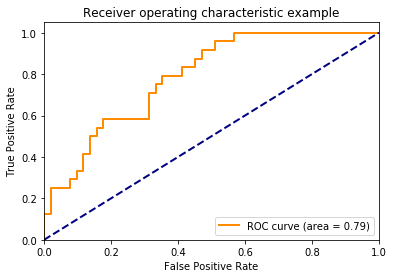

In [301]:
plt.figure()
lw = 2

plt.plot(fpr[2], tpr[2], 
         color='darkorange',
         lw=lw, 
         label='ROC curve (area = %0.2f)' % roc_auc[2])

plt.plot([0, 1], [0, 1], 
         color='navy', 
         lw=lw, 
         linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()

Automatically created module for IPython interactive environment


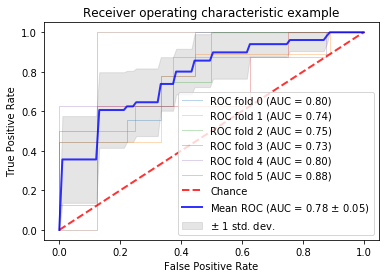

In [302]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


# data
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape
# noisy feature
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

classifier = svm.SVC(kernel='linear', 
                     probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, 
                 color='grey', 
                 alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Regression

### R^2

The coefficient of determination. Scores regression function.

- Returns float (or ndarray of floats if multioutput=‘raw_values’)
- Best score: 1.0
- Can be negative
- 'A constant model that always predicts the expected value of y, 
   disregarding the input features, would get a R^2 score of 0.0.'
- Not symmetric.

<b>Multioutput</b>. Defines aggregating of multiple output scores, array-like value defines weights used to average scores. (default=“uniform_average”)

- multioutput=‘raw_values’: Returns a full set of scores in case of multioutput input.
- multioutput=‘uniform_average’: Scores of all outputs are averaged with uniform weight.
- multioutput=‘variance_weighted’: Scores of all outputs are averaged, weighted by the variances of each individual output.

In [147]:
y_test      = [11, 11, 10, 10, 11] # Ground truth 
predictions = [11, 11, 10, 10, 10] # Predictions

from sklearn.metrics import r2_score
r2score = r2_score(y_test, predictions)  
print('{}'.format(r2score))

0.16666666666666674


In [103]:
y_test      = [[0.4, 11], [0.5, 11], [0.6, 12]]
predictions = [[0.4, 10], [0.5, 11], [0.3, 12]]

from sklearn.metrics import r2_score
r2score = r2_score(y_test, predictions, multioutput='variance_weighted')  
print('{}'.format(r2score))

-0.587378640776699


In [101]:
y_test      = [[0.4, 10], [0.5, 11], [0.6, 12]]
predictions = [[0.4, 10], [0.5, 11], [0.3, 12]]

from sklearn.metrics import r2_score
r2score = r2_score(y_test, predictions, multioutput='raw_values')  
print('{}'.format(r2score))

[-3.5  1. ]


### Mean Squared Error (MSE)


- Mean squared error regression loss
- Returns: loss (non negative float) for each target.
- multioutput: Aggregating of multiple output values (weights used to average errors)  (default=“uniform_average”):

   a) multioutput=‘uniform_average’:  Scores of all outputs are averaged with uniform weight.

   b) multioutput=‘raw_values’: Returns a full set of scores in case of multioutput input.

In [148]:
from sklearn.metrics import mean_squared_error

y_test      = [3.0, -0.5, 2, 7, 3] # Ground truth
predictions = [2.5, -1.0, 2, 8, 3] # Predictions

mse = mean_squared_error(y_test, predictions)

print('{}'.format(mse))

0.3


In [158]:
y_test      = [[0.5, 1], [-11, 13], [2, -4]] # Ground truth
predictions = [[0.1, 2], [-11, 22], [3, -3]] # Predictions

mse = mean_squared_error(y_test, predictions) # uniform average
print('{}'.format(mse))

14.026666666666667


In [156]:
mse = mean_squared_error(y_test, predictions, multioutput=[0.5, 0.5])
print('{}'.format(mse))

14.026666666666667


In [157]:
mse = mean_squared_error(y_test, predictions, multioutput='raw_values')
print('{}'.format(mse))

[ 0.38666667 27.66666667]


### Mean Absolute Error (MAE)


<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>MAE</mtext>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mover>
    <mi>y</mi>
    <mo stretchy="false">&#x005E;<!-- ^ --></mo>
  </mover>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <msub>
      <mi>n</mi>
          <mtext>samples</mtext>
    </msub>
  </mfrac>
  <munderover>
    <mo>&#x2211;<!-- ∑ --></mo>
    <mrow>
      <mi>i</mi>
      <mo>=</mo>
      <mn>0</mn>
    </mrow>
    <mrow>
      <msub>
        <mi>n</mi>
              <mtext>samples</mtext>
      </msub>
      <mo>&#x2212;<!-- − --></mo>
      <mn>1</mn>
    </mrow>
  </munderover>
  <mrow>
    <mo>|</mo>
    <mrow>
      <msub>
        <mi>y</mi>
        <mi>i</mi>
      </msub>
      <mo>&#x2212;<!-- − --></mo>
      <msub>
              <mover>
          <mi>y</mi>
          <mo stretchy="false">&#x005E;<!-- ^ --></mo>
        </mover>
        <mi>i</mi>
      </msub>
    </mrow>
    <mo>|</mo>
  </mrow>
  <mo>.</mo>
</math>

Mean absolute error regression loss.
- non-negative float
- the best value is 0.0
- returns float or ndarray of floats
- multioutput (default=“uniform_average”): Aggregating of multiple output values (weights used to average errors)
- a) multioutput=‘raw_values’: Returns a full set of scores in case of multioutput input.
- b) multioutput=‘uniform_average’:  Scores of all outputs are averaged with uniform weight.


In [164]:
from sklearn.metrics import mean_absolute_error

y_test      = [3.5, -0.5, 1, 3, 3] # Ground truth
predictions = [2.5, -1.0, 1, 4, 5] # Predictions

mae = mean_absolute_error(y_test, predictions)
print('{}'.format(mae))

0.9


#### Return MAE score

In [280]:
y_test      = [[0.5, 1, 1], [-11, 13, 43], [2, 43, -4]] # Ground truth
predictions = [[0.1, 2, 1], [-11, 22, 12], [3, 37, -3]] # Predictions

mae = mean_absolute_error(y_test, predictions)
print('{}'.format(mae))

5.488888888888888


#### To return the mean absolute error for each output separately

In [166]:
mae = mean_absolute_error(y_test, predictions, multioutput='raw_values')
print('{}'.format(mae))

[ 0.46666667  5.33333333 10.66666667]


#### Weights

In [167]:
mae = mean_absolute_error(y_test, predictions, multioutput=[1, 1, 1])
print('{}'.format(mae))

5.488888888888888


### Explained Variance
Explained variance regression score function

sklearn.metrics.explained_variance_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')

- Best possible score is 1.0
- Not a symmetric function.
- Returns: float or ndarray of floats

Multioutput: defines aggregating of multiple output scores.
Array-like value defines weights used to average scores.
- raw_values: Returns a full set of scores in case of multioutput input.
- uniform_average: Scores of all outputs are averaged with uniform weight.
- variance_weighted: Scores of all outputs are averaged, weighted by the variances of each individual output.


In [251]:
from sklearn.metrics import explained_variance_score

In [233]:
y_true = [3, -5.5, 5, 5]
y_pred = [4,  5.2, 6, 6]
explained_variance_score(y_true, y_pred)  

0.06144638403990055

In [256]:
y_true = [[5, -14], [5, -5], [5, -5]]
y_pred = [[2, -12], [3, -2], [4, -3]]
explained_variance_score(y_true, y_pred, multioutput='uniform_average')

0.49382716049382713

## Clustering

### Adjusted Rand Score
Rand index adjusted for chance.



- Returns: float
- Similarity score between -1.0 and 1.0. 
- Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.
- ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
- ARI is a symmetric: adjusted_rand_score(a, b) == adjusted_rand_score(b, a)
- computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:
- The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).


In [185]:
from sklearn.metrics import adjusted_rand_score

#### Perfectly matching labelings have a score of 1 even

In [275]:
adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

In [276]:
adjusted_rand_score([0, 1, 1, 1], [0, 1, 1, 1])

1.0

#### Labelings that assign all classes members to the same clusters are complete be not always pure, hence penalized:


In [277]:
adjusted_rand_score([0, 0, 1, 2], [0, 0, 1, 1])  

0.5714285714285715

#### ARI is symmetric, so labelings that have pure clusters with members coming from the same classes but unnecessary splits are penalized:


In [278]:
adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 2])

0.5714285714285715

#### If classes members are completely split across different clusters, the assignment is totally incomplete, hence the ARI is very low:

In [279]:
adjusted_rand_score([0, 0, 0, 0], [0, 1, 2, 3])

0.0

### Homogeneity Score
A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

- Returns: float
- score between 0.0 and 1.0. 
- 1.0 stands for perfectly homogeneous labeling
- This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.
- This metric is not symmetric: switching label_true with label_pred will return the completeness_score which will be different in general.

In [212]:
from sklearn.metrics import homogeneity_score

#### Perfect labelings are homogeneous

In [270]:
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [271]:
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 0, 1, 2]))

1.000000


In [272]:
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))

1.000000


#### Clusters that include samples from different classes do not make for an homogeneous labeling

In [273]:
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 1, 0, 1]))

0.000000


In [274]:
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000000


### V Measure Score
The V-measure is the harmonic mean between homogeneity and completeness.

- Returns: float
- score between 0.0 and 1.0.
- 1.0 stands for perfectly complete labeling
- This score is identical to normalized_mutual_info_score with the 'arithmetic' option for averaging.
- v = 2 * (homogeneity * completeness) / (homogeneity + completeness)
- This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.
- This metric is symmetric: switching label_true with label_pred will return the same score value.




In [259]:
from sklearn.metrics import v_measure_score

#### Perfect labelings are both homogeneous and complete, hence have score 1.0:

In [260]:
v_measure_score([0, 0, 1, 1], [0, 0, 1, 1])
v_measure_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

#### Labelings that assign all classes members to the same clusters are complete be not homogeneous, hence penalized

In [221]:
print("%.6f" % v_measure_score([0, 0, 1, 2], [0, 0, 1, 1]))
print("%.6f" % v_measure_score([0, 1, 2, 3], [0, 0, 1, 1]))

0.800000
0.666667


#### Labelings that have pure clusters with members coming from the same classes are homogeneous but un-necessary splits harms completeness and thus penalize V-measure as well:

In [262]:
print("%.6f" % v_measure_score([0, 0, 1, 1], [0, 0, 1, 2]))
print("%.6f" % v_measure_score([0, 0, 1, 1], [0, 1, 2, 3]))

0.800000
0.666667


#### If classes members are completely split across different clusters, the assignment is totally incomplete, hence the V-Measure is null:

In [263]:
print("%.6f" % v_measure_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.000000


#### Clusters that include samples from totally different classes totally destroy the homogeneity of the labeling, hence:

In [264]:
print("%.6f" % v_measure_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000000


### Completeness
Completeness metric of a cluster labeling given a ground truth.

- Returns: completeness : float
- score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling
- A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
- independent of the absolute values of the labels
- a permutation of the class or cluster label values won’t change the score value in any way.
- not symmetric.

#### Perfect labelings: complete

In [224]:
from sklearn.metrics.cluster import completeness_score
completeness_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

#### Labelings that assign all classes members to the same clusters: complete

In [225]:

print(completeness_score([0, 0, 1, 1], [0, 0, 0, 0]))
print(completeness_score([0, 1, 2, 3], [0, 0, 1, 1]))

1.0
0.9999999999999999


#### Classes members split across different clusters: not complete

In [258]:
print(completeness_score([0, 0, 1, 1], [0, 1, 0, 1]))
print(completeness_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.0
0.0
